# Emerging Technologies Project

The following notebook trains a model that can be used to predict power output from wind speed values, as defined in the `powerproduction` dataset.

## Preamble

I'll begin by importing the necessary packages and reading in the dataset.

In [1]:
import tensorflow.keras as kr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Plot style
plt.style.use("ggplot")

# Plot size
plt.rcParams["figure.figsize"] = [14, 8]

In [3]:
# Read in the dataset
df = pd.read_csv("./powerproduction.csv")

# Print the first few rows
df.head(8)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826


Next I'll partition the dataset it into two subsets. The first will be used to fit the model and is referred to as the training dataset, while the second will instead be used to make predictions based on the training data. The objective of splitting the data is to provide a way to estimate the performance of the machine learning model when it is presented with new data, i.e. data that wasn't used to train the model [1].

The training set will make up 80% of the total items in the overall dataset.

In [4]:
# Create train and test sets
# Reference: TensorFlow documentation
# https://www.tensorflow.org/tutorials/keras/regression#split_the_data_into_train_and_test
train = df.sample(frac=0.8, random_state=0)
test = df.drop(train.index)

print("Training:")
print(train.head())
print("\nTesting:")
print(test.head())

Training:
      speed    power
90    4.905    7.060
254  12.713   51.149
283  14.489   71.763
445  22.422   99.357
461  23.273  113.556

Testing:
    speed  power
9   0.526  5.553
25  1.051  2.085
28  1.151  1.208
31  1.301  0.000
32  1.401  4.156


In order to better visualise the training and testing data sets we can plot them both side by side using Matplotlib.

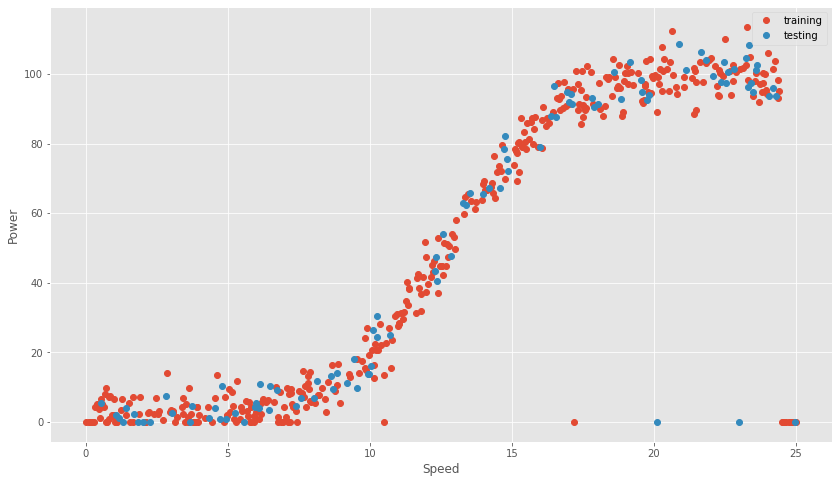

In [5]:
plt.plot(
    train.speed,
    train.power,
    "o",
    label="training"
)

plt.plot(
    test.speed, 
    test.power,
    "o",
    label="testing"
)

plt.xlabel("Speed")
plt.ylabel("Power")

plt.legend();

## Creating a Linear Model

First I'll construct a linear modal and attempt to make predictions using that. This is done below using Keras' `Sequential` class, which represents a linear grouping of layers [2]. The model created below contains a single dense layer. A dense layer is a layer in neural network that’s fully connected, meaning all the neurons in one layer are connected to all other neurons in the next layer [2].

In [6]:
# Create a neural network with one neuron
model = kr.models.Sequential()

# Add a single dense layer
model.add(
    kr.layers.Dense(
        1,
        input_shape=(1,),
        activation="linear",
        kernel_initializer="ones",
        bias_initializer="zeros"
    )
)

# Compile the model
model.compile("adam", loss="mean_squared_error")

In [7]:
# Train the neural network on the training data
model.fit(
    train.speed,
    train.power,
    epochs=200,
    batch_size=10
)

Epoch 1/200
40/40 [==============================] - 0s 801us/step - loss: 2261.8332
Epoch 2/200
40/40 [==============================] - 0s 996us/step - loss: 2533.2803
Epoch 3/200
40/40 [==============================] - 0s 801us/step - loss: 2389.1863
Epoch 4/200
40/40 [==============================] - 0s 801us/step - loss: 2381.1014
Epoch 5/200
40/40 [==============================] - 0s 802us/step - loss: 2235.4813
Epoch 6/200
40/40 [==============================] - 0s 801us/step - loss: 2161.4975
Epoch 7/200
40/40 [==============================] - 0s 568us/step - loss: 2149.2358
Epoch 8/200
40/40 [==============================] - 0s 802us/step - loss: 2118.5072
Epoch 9/200
40/40 [==============================] - 0s 402us/step - loss: 2021.9996
Epoch 10/200
40/40 [==============================] - 0s 568us/step - loss: 2016.0760
Epoch 11/200
40/40 [==============================] - 0s 798us/step - loss: 1943.8343
Epoch 12/200
40/40 [==============================] - 0s 1ms/st

40/40 [==============================] - 0s 402us/step - loss: 563.6943
Epoch 98/200
40/40 [==============================] - 0s 801us/step - loss: 649.5760
Epoch 99/200
40/40 [==============================] - 0s 401us/step - loss: 569.5060
Epoch 100/200
40/40 [==============================] - 0s 801us/step - loss: 551.0641
Epoch 101/200
40/40 [==============================] - 0s 568us/step - loss: 600.6387
Epoch 102/200
40/40 [==============================] - 0s 401us/step - loss: 521.6940
Epoch 103/200
40/40 [==============================] - 0s 401us/step - loss: 484.9332
Epoch 104/200
40/40 [==============================] - 0s 401us/step - loss: 554.4137
Epoch 105/200
40/40 [==============================] - 0s 569us/step - loss: 599.3789
Epoch 106/200
40/40 [==============================] - 0s 401us/step - loss: 610.0550
Epoch 107/200
40/40 [==============================] - 0s 401us/step - loss: 501.1199
Epoch 108/200
40/40 [==============================] - 0s 402us/step -

40/40 [==============================] - 0s 401us/step - loss: 464.2471
Epoch 193/200
40/40 [==============================] - 0s 801us/step - loss: 710.1811
Epoch 194/200
40/40 [==============================] - 0s 401us/step - loss: 758.6691
Epoch 195/200
40/40 [==============================] - 0s 568us/step - loss: 441.6343
Epoch 196/200
40/40 [==============================] - 0s 401us/step - loss: 689.2833
Epoch 197/200
40/40 [==============================] - 0s 401us/step - loss: 528.6926
Epoch 198/200
40/40 [==============================] - 0s 801us/step - loss: 456.8359
Epoch 199/200
40/40 [==============================] - 0s 568us/step - loss: 496.8105
Epoch 200/200
40/40 [==============================] - 0s 401us/step - loss: 499.7053


### Analysis

Now that the training process is complete, the model can be used to make predictions. First I'll visualise the results by plotting the values from the `train` dataset along with the predicted values of each point from the `test` dataset.

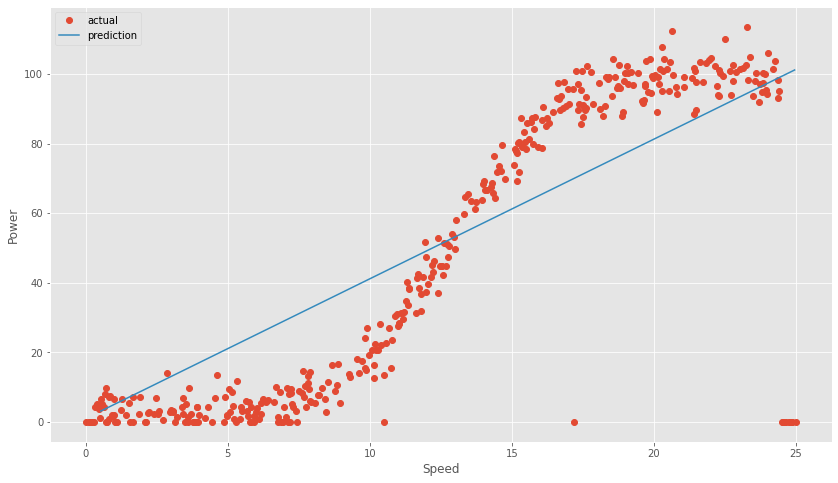

In [8]:
# Plot the training dataset
plt.plot(
    train.speed,
    train.power,
    "o",
    label="actual"
)

# Plot the predictions from the `test` dataset
plt.plot(
    test.speed, 
    model.predict(test.speed),
    label="predictions"
)

plt.xlabel("Speed")
plt.ylabel("Power")

plt.legend();

We can also predict individual values using Keras' `model.predict()` function. Below I find the predicted power output if the speed is 20, and then show where the result appears on the plot.

In [9]:
# Take a hand-picked speed value and view its predicted power value
pred_speed = 20.0
pred_power = model.predict([pred_speed])[0]

pred_power

array([81.264915], dtype=float32)

In [10]:
def plot_predictions():
    # Plot the predictions of the x values we trained on
    plt.plot(
        train.speed,
        train.power,
        "o",
        label="actual"
    )

    plt.plot(
        test.speed, 
        model.predict(test.speed),
        label="predictions"
    )

    plt.xlabel("Speed")
    plt.ylabel("Power")

    # Show the prediction location on the plot
    # Ref: https://www.mathworks.com/matlabcentral/answers/430336-draw-lines-from-both-axis-to-point-in-plot
    plt.plot([pred_speed, pred_speed], [0, pred_power], "k-")
    plt.plot([0, pred_speed], [pred_power, pred_power], "k-") 

    plt.legend();

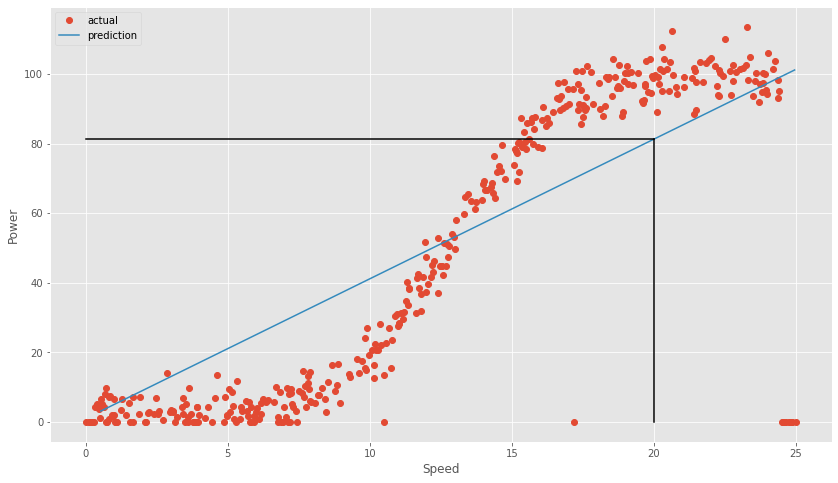

In [11]:
plot_predictions()

As illustrated above, if we attempt to predict the power when the wind speed is 20, we get a value that is much lower than what we would expect. This is because the data in our dataset is not linear, and therefore linear regression is not the best form of regression to perform if we want to make accurate predictions.

## Non-Linear Regression

Linear regression assumes that the relationship between an independent variable $x$ and a dependent variable $y$ can be best expressed with a line [3]. However, because the `powerproduction` dataset is non-linear, it would make more sense to do polynomial regression. Polynomial regression expresses the relationship between two variables as a polynomial curve [3].

In [12]:
# Re-build the model
model = kr.models.Sequential()

model.add(
    kr.layers.Dense(
        64,
        input_shape=(1,),
        activation="sigmoid",
        kernel_initializer="glorot_uniform",
        bias_initializer="glorot_uniform"
    )
)

model.add(
    kr.layers.Dense(
        1,
        activation="linear",
    )
)

model.compile(kr.optimizers.Adam(lr=0.001), loss="mean_squared_error")

In [13]:
# Fit the data.
model.fit(
    train.speed,
    train.power,
    epochs=300,
    batch_size=10
)

Epoch 1/300
40/40 [==============================] - 0s 959us/step - loss: 3987.0091
Epoch 2/300
40/40 [==============================] - 0s 803us/step - loss: 3958.6822
Epoch 3/300
40/40 [==============================] - 0s 799us/step - loss: 3240.0120
Epoch 4/300
40/40 [==============================] - 0s 968us/step - loss: 3052.7767
Epoch 5/300
40/40 [==============================] - 0s 894us/step - loss: 3106.9024
Epoch 6/300
40/40 [==============================] - 0s 1ms/step - loss: 2914.5459
Epoch 7/300
40/40 [==============================] - 0s 865us/step - loss: 2662.7380
Epoch 8/300
40/40 [==============================] - 0s 801us/step - loss: 2354.6497
Epoch 9/300
40/40 [==============================] - 0s 802us/step - loss: 2472.6493
Epoch 10/300
40/40 [==============================] - 0s 967us/step - loss: 2399.2002
Epoch 11/300
40/40 [==============================] - 0s 801us/step - loss: 2039.5902
Epoch 12/300
40/40 [==============================] - 0s 801us/st

40/40 [==============================] - 0s 568us/step - loss: 362.9756
Epoch 97/300
40/40 [==============================] - 0s 401us/step - loss: 338.7798
Epoch 98/300
40/40 [==============================] - 0s 801us/step - loss: 379.4246
Epoch 99/300
40/40 [==============================] - 0s 802us/step - loss: 329.3851
Epoch 100/300
40/40 [==============================] - ETA: 0s - loss: 104.052 - 0s 568us/step - loss: 355.4980
Epoch 101/300
40/40 [==============================] - 0s 802us/step - loss: 321.5577
Epoch 102/300
40/40 [==============================] - 0s 801us/step - loss: 355.3722
Epoch 103/300
40/40 [==============================] - 0s 727us/step - loss: 198.1587
Epoch 104/300
40/40 [==============================] - 0s 801us/step - loss: 386.9777
Epoch 105/300
40/40 [==============================] - 0s 400us/step - loss: 300.0576
Epoch 106/300
40/40 [==============================] - ETA: 0s - loss: 74.88 - 0s 401us/step - loss: 341.6379
Epoch 107/300
40/40 [

40/40 [==============================] - 0s 801us/step - loss: 349.3704
Epoch 191/300
40/40 [==============================] - 0s 568us/step - loss: 239.7116
Epoch 192/300
40/40 [==============================] - 0s 400us/step - loss: 216.9800
Epoch 193/300
40/40 [==============================] - 0s 801us/step - loss: 276.0369
Epoch 194/300
40/40 [==============================] - 0s 401us/step - loss: 352.5526
Epoch 195/300
40/40 [==============================] - 0s 1ms/step - loss: 188.8224
Epoch 196/300
40/40 [==============================] - 0s 506us/step - loss: 198.7543
Epoch 197/300
40/40 [==============================] - 0s 401us/step - loss: 357.4726
Epoch 198/300
40/40 [==============================] - 0s 400us/step - loss: 255.3453
Epoch 199/300
40/40 [==============================] - 0s 401us/step - loss: 182.2145
Epoch 200/300
40/40 [==============================] - 0s 801us/step - loss: 248.8421
Epoch 201/300
40/40 [==============================] - 0s 401us/step -

40/40 [==============================] - 0s 568us/step - loss: 429.1197
Epoch 286/300
40/40 [==============================] - 0s 401us/step - loss: 293.2826
Epoch 287/300
40/40 [==============================] - 0s 801us/step - loss: 276.5899
Epoch 288/300
40/40 [==============================] - 0s 401us/step - loss: 225.1485
Epoch 289/300
40/40 [==============================] - 0s 568us/step - loss: 204.3296
Epoch 290/300
40/40 [==============================] - 0s 401us/step - loss: 307.9474
Epoch 291/300
40/40 [==============================] - 0s 1ms/step - loss: 258.1297
Epoch 292/300
40/40 [==============================] - 0s 593us/step - loss: 196.6724
Epoch 293/300
40/40 [==============================] - 0s 402us/step - loss: 313.9280
Epoch 294/300
40/40 [==============================] - 0s 401us/step - loss: 233.2397
Epoch 295/300
40/40 [==============================] - 0s 801us/step - loss: 203.6460
Epoch 296/300
40/40 [==============================] - 0s 568us/step -

### Analysis

Once again, we can use this newly created model to make predictions. As done previously, I'll plot the values of the `train` dataset along with the predicted values of each point in the `test` dataset. Doing so, we'll find the predicted values form a curved line.

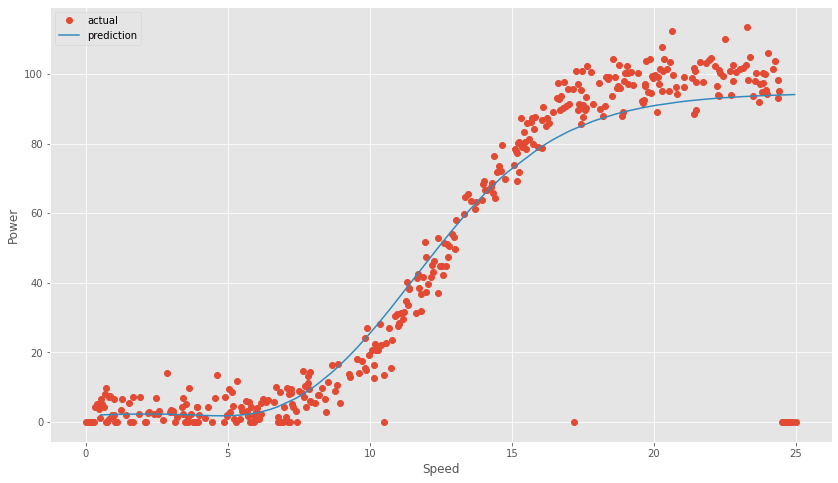

In [14]:
plt.plot(
    train.speed,
    train.power,
    "o",
    label="actual"
)

plt.plot(
    test.speed,
    model.predict(test.speed),
    label="prediction"
)

plt.xlabel("Speed")
plt.ylabel("Power")

plt.legend();

Again, we can provide an input speed of 20 to Keras' `model.predict()` function and plot the result.

In [15]:
pred_power = model.predict([pred_speed])[0]

pred_power

array([90.87338], dtype=float32)

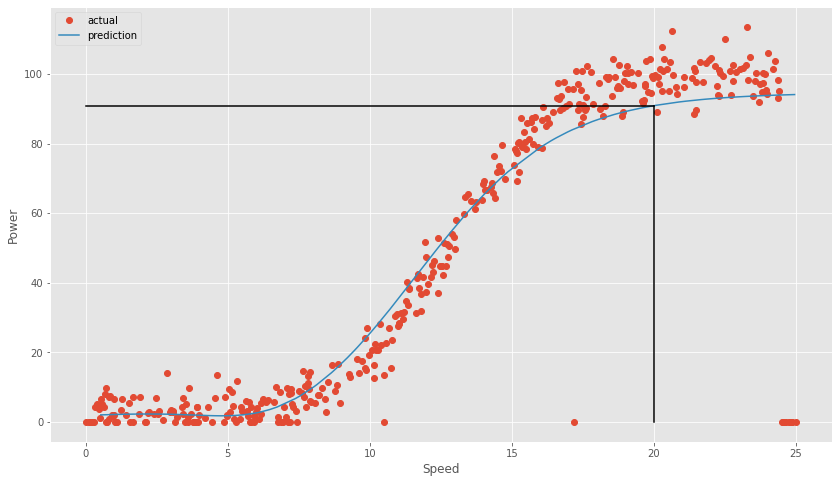

In [16]:
plot_predictions()

We see that the result when using non-linear regression is much more accurate compared to the linear model tested previously.

## Saving the Model

We can use `model.save()` to easily save the model for later use in the web application.

In [17]:
model.save("power_prod.h5")

## References

1. [Train-Test Split for Evaluating Machine Learning Algorithms](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/). Jason Brownlee. Machine Learning Mastery.
1. [Linear Regression using Keras and Python](https://heartbeat.fritz.ai/linear-regression-using-keras-and-python-7cee2819a60c). Dhiraj K. Heartbeat.
2. [Polynomial Regression using tf.keras](https://medium.com/@anigasan637/polynomial-regression-using-tf-keras-17eaac771256). Ananya Gangavarapu. Medium.